In [7]:
%pylab inline

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv('oscarsDates.csv', parse_dates=['announcement', 'show'])
df.head()

,year,announcement,show,best_picture_noms,nielsen
0,2016,2017-01-24,2017-02-26,9,32.9
1,2015,2016-01-14,2016-02-28,8,34.4
2,2014,2015-01-15,2015-02-22,8,37.3
3,2013,2014-01-16,2014-03-02,9,43.7
4,2012,2013-01-10,2013-02-24,9,40.4


In [9]:
df['diff_days'] = (df['show'] - df['announcement']).dt.days

In [10]:
df.head()

,year,announcement,show,best_picture_noms,nielsen,diff_days
0,2016,2017-01-24,2017-02-26,9,32.9,33
1,2015,2016-01-14,2016-02-28,8,34.4,45
2,2014,2015-01-15,2015-02-22,8,37.3,38
3,2013,2014-01-16,2014-03-02,9,43.7,45
4,2012,2013-01-10,2013-02-24,9,40.4,45


### What does the break usually look like?

Text(72,2009.1,'10 Best Pictures Noms, instead of 5')

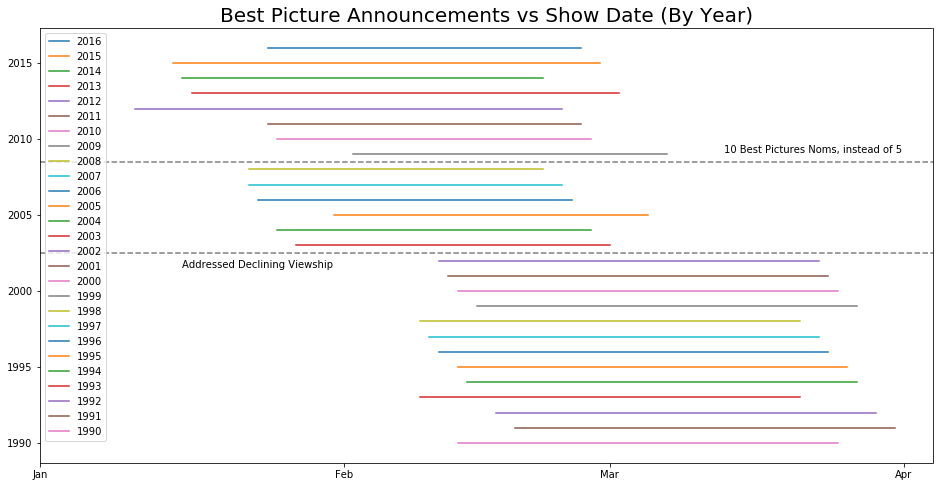

In [11]:
brg = plt.get_cmap('brg')
ran = np.linspace(0, 1, 27)

announcements = df['announcement'].dt.dayofyear.values
shows = df['show'].dt.dayofyear.values

fig, ax = plt.subplots(figsize=(16,8))
for idx, year in enumerate(range(2016, 1989, -1)):
    ax.plot((announcements[idx], shows[idx]), (year, year), label=year)
    
ax.set_xlim(0)
plt.legend()
ax.axhline(2002.5, color='k', alpha=.5, linestyle='--')
ax.axhline(2008.5, color='k', alpha=.5, linestyle='--')
ax.set_xticks([0, 32, 60, 91])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr'])
ax.set_title('Best Picture Announcements vs Show Date (By Year)', size=20)

ax.annotate('Addressed Declining Viewship', (15, 2001.5))
ax.annotate('10 Best Pictures Noms, instead of 5', (72, 2009.1))

Per Wikipedia:

In light of the record low viewership from the preceding year's ceremony, the Academy sought to make several changes and hire a new producer for the upcoming show. AMPAS announced that unlike previous years where the ceremony typically was held in either late March or early April, the festivities would be held in late February. AMPAS director of communications John Pavlik explained that the purpose of moving the telecast a month earlier was "to bolster the ceremony's sagging television ratings and protect the Oscar's status as the nation's pre-eminent awards event." Despite several Academy officials denying such reasons, some industry insiders speculated that the earlier Oscar date was also implemented to mitigate the intense campaigning and lobbying during Oscar season put forth by film studios.This marked the first time since the 14th ceremony that the awards were held outside the aforementioned time frame.

### Ratings by year

Text(2012.5,44.5,'Ellen, lol')

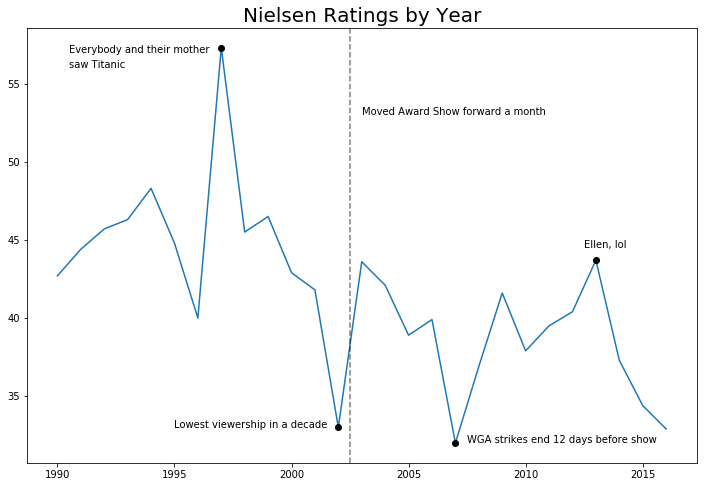

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df['year'], df['nielsen'])
ax.set_title('Nielsen Ratings by Year', size=20)

ax.plot(1997, 57.3, 'ok')
ax.annotate('Everybody and their mother', (1990.5, 57))
ax.annotate('saw Titanic', (1990.5, 56))
ax.plot(2002, 33, 'ok')
ax.annotate('Lowest viewership in a decade', (1995, 33))

ax.axvline(2002.5, alpha=.5, linestyle='--', color='k')
ax.annotate('Moved Award Show forward a month', (2003, 53))

ax.plot(2007, 32, 'ok')
ax.annotate('WGA strikes end 12 days before show', (2007.5, 32))

ax.plot(2013, 43.7, 'ok')
ax.annotate('Ellen, lol', (2012.5, 44.5))

###  When will they announce?

Historically, they've only announced Tues, Wed, Thurs

In [13]:
df['announcement'].dt.dayofweek.value_counts().sort_index()

1    18
2     4
3     5
Name: announcement, dtype: int64

For award shows on Saturday/Sunday

In [14]:
df['show'].dt.dayofweek.value_counts().sort_index()

0     8
6    19
Name: show, dtype: int64

However, they haven't announced on a Wednesday in forever.

In [15]:
tmp = pd.Series(df['announcement'].dt.dayofweek.values, index=df['year'])
tmp[tmp == 2]

year
1993    2
1992    2
1991    2
1990    2
dtype: int64

So how long do they typically wait between announcement and the show?

In [16]:
df['diff_days'].describe()

count    27.000000
mean     37.962963
std       4.354321
min      31.000000
25%      33.000000
50%      40.000000
75%      40.500000
max      45.000000
Name: diff_days, dtype: float64

Given that, and [given that we know when this year's show will be](http://oscar.go.com/news/oscar-news/new-broadcast-time-for-the-90th-oscars-announced)

In [17]:
airDate = pd.Timestamp(year=2018, day=4, month=3)

Let's try and back into a prediction

In [18]:
daydiff_mu = df['diff_days'].mean()
daydiff_sig = df['diff_days'].std()

dmin = daydiff_mu - daydiff_sig
dmax = daydiff_mu + daydiff_sig

for i in range(int(dmin), int(dmax)+1):
    possVal = (airDate - datetime.timedelta(days=i))
    if possVal.dayofweek in [1, 3]:
        print(possVal.date(), possVal.dayofweek, (airDate-possVal).days)

2018-01-30 1 33
2018-01-25 3 38
2018-01-23 1 40


Text(0.5,1,'Days Between Announcement and Show (By Year)')

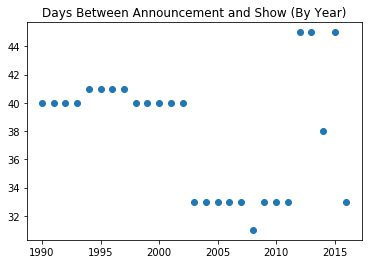

In [19]:
fig, ax = plt.subplots()
ax.plot(df['year'], df['diff_days'], 'o')
ax.set_title('Days Between Announcement and Show (By Year)')